In [2]:
import numpy as np   # Provides most math operations 
from matplotlib import pyplot as plt     # Provides most plotting
import seaborn as sns                    # Extra plotting
from skimage import data, io, filters, morphology, segmentation, measure

from os import listdir    # folder commands
from os.path import isfile, join  # file commands
import tifffile as tiff         # Loads tiff files as numpy arrays
import cv2

plt.style.use(['default'])   # Sets image format

In [3]:
plt.style.use(['default'])
tiff_dir = "./"  ## This is the folder with the images
tiff_files=[f for f in listdir(tiff_dir) if isfile(join(tiff_dir, f)) & (f[-4:]=="tiff")]   # This makes a list of all the "tiff" files in the folder
print("TIFF files: ",tiff_files)

TIFF files:  ['IMG_20200614_113127.tiff', 'IMG_20200614_113130.tiff', 'IMG_20200614_113134.tiff', 'IMG_20200614_113138.tiff', 'IMG_20200614_113142.tiff', 'IMG_20200614_113145.tiff', 'IMG_20200614_113155.tiff', 'IMG_20200614_113202.tiff', 'IMG_20200614_113224.tiff', 'IMG_20200614_113225.tiff', 'IMG_20200614_113255.tiff', 'IMG_20200614_113320.tiff', 'IMG_20200614_113325.tiff', 'IMG_20200614_113327.tiff', 'IMG_20200614_113329.tiff', 'IMG_20200614_113331.tiff', 'IMG_20200614_113333.tiff', 'IMG_20200614_113344.tiff', 'IMG_20200614_113347.tiff', 'IMG_20200614_113352.tiff', 'IMG_20200614_113355.tiff', 'IMG_20200614_113358.tiff', 'IMG_20200614_113400.tiff', 'IMG_20200614_113402.tiff', 'IMG_20200614_113406.tiff', 'IMG_20200614_113408.tiff', 'IMG_20200614_113411.tiff', 'IMG_20200614_113413.tiff', 'IMG_20200614_113418.tiff', 'IMG_20200614_113426.tiff', 'IMG_20200614_113429.tiff', 'IMG_20200614_113431.tiff', 'IMG_20200614_113440.tiff', 'IMG_20200614_113450.tiff', 'IMG_20200614_113452.tiff', 'IMG_2

In [4]:
def generateBinaryImg(I):
    I_intensity = (I[:,:,1] > 1000) # identify pixels with low GREEN values - they are less reliable
    I_cr = I[:,:,0]/I[:,:,1]  # This is the ratio of Red (0) to Green (1)
    I_cr[~I_intensity] = 1000    # small green values would have infinite or near infinite ratios, replace with a "big" number instead for visualization
    I_sig = (I[:,:,0] > 1.0*I[:,:,1]) & I_intensity # Create image identifying flames on brightness & color basis
    I_sig = np.uint8(I_sig)
    I_processed = cv2.morphologyEx(I_sig, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4,4)))
    return I_processed
def generateUnfilteredBinaryImg(I):
    I_intensity = (I[:,:,1] > 1000) # identify pixels with low GREEN values - they are less reliable
    I_cr = I[:,:,0]/I[:,:,1]  # This is the ratio of Red (0) to Green (1)
    I_cr[~I_intensity] = 1000    # small green values would have infinite or near infinite ratios, replace with a "big" number instead for visualization
    I_sig = (I[:,:,0] > 1.0*I[:,:,1]) & I_intensity # Create image identifying flames on brightness & color basis
    return I_sig

C:\Users\kaitl\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


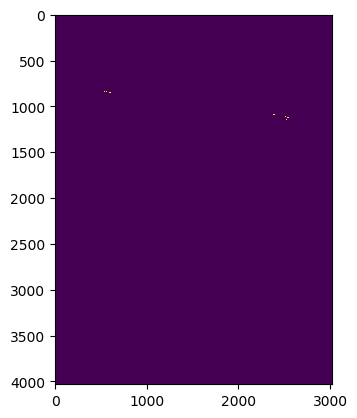

In [53]:
fig, ax = plt.subplots()
ax.imshow(generateBinaryImg(tiff.imread(join(tiff_dir, tiff_files[0]))))

C:\Users\kaitl\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
C:\Users\kaitl\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


./IMG_20200614_113138.tiff - 1.0005306667278961
./IMG_20200614_113142.tiff - 1.0005306667278961
./IMG_20200614_113145.tiff - 0.9942332108954055
./IMG_20200614_113155.tiff - 0.8871057928541339
./IMG_20200614_113325.tiff - 0.9999999846497123
./IMG_20200614_113411.tiff - 0.6314777915917765
./IMG_20200614_113440.tiff - 0.8453980368805026


KeyboardInterrupt: 

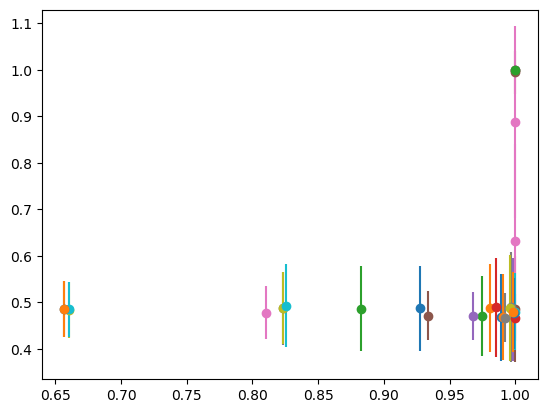

In [11]:
fig, ax= plt.subplots() 
image_Num= 0
for x in tiff_files:
    tiff_name = join(tiff_dir, tiff_files[image_Num])
    I = tiff.imread(tiff_name)
    I_intensity = (I[:,:,1] > 1000) # identify pixels with low GREEN values - they are less reliable
    I_cr = I[:,:,0]/I[:,:,1]  # This is the ratio of Red (0) to Green (1)
    I_cr[~I_intensity] = 1000    # small green values would have infinite or near infinite ratios, replace with a "big" number instead for visualization
    mean = np.mean(I_cr[I_intensity])
    if mean>0.6:
        print(tiff_name + " - " + str(mean))
    plt.errorbar(np.mean(I_intensity), mean, np.std(I_cr[I_intensity]), linestyle='None', marker='o')
    image_Num+=1

#plt.errorbar(imageNum, mean, np.std(I_cr[I_intensity]), linestyle='None', marker='o')
ax.set_ylabel("Color Ratio: R/G")
ax.set_xlabel("Mean Intensity")
ax.set_title("Error in Distribution of R/G Ratios")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Image 2')

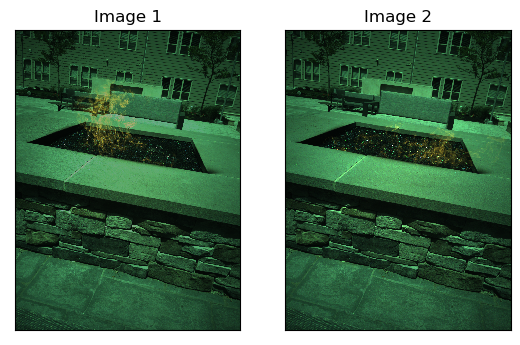

In [7]:
fig, ax = plt.subplots(ncols = 2)
width = 4032
height = 3024

def averageIntensities(im1,im2):
    I_1 = tiff.imread(join(tiff_dir, tiff_files[im1]))  # This loads the image file into memory
    I_2 = tiff.imread(join(tiff_dir, tiff_files[im2]))  # This loads the image file into memory
    I_crop1 = I_1[width-200:width, height-200:height]
    I_crop2 = I_2[width-200:width, height-200:height]
    mean_1 = np.mean(I_crop1)
    mean_2 = np.mean(I_crop2)
    average = 0.5*(mean_1+mean_2)
    if average > 10000:
        average = 10000
    elif average <1000:
        average = 1000
    I_1 = (average/mean_1)*I_1
    I_2 = (average/mean_2)*I_2
    return I_1,I_2

images = averageIntensities(29,30)   
I_1, I_2 = images[0], images[1]
I_orig1, I_orig2 = I_1, I_2
[ax[j].get_yaxis().set_visible(False) for j in range(2)]
[ax[j].get_xaxis().set_visible(False) for j in range(2)]
ax[0].imshow(I_1/256**2)
ax[1].imshow(I_2/256**2)
ax[0].set_title("Image 1")
ax[1].set_title("Image 2")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


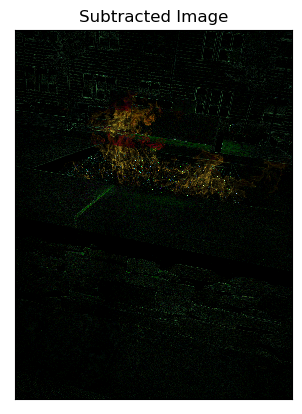

In [10]:
def isSaturated(image):
    I = tiff.imread(join(tiff_dir, tiff_files[image]))
    I_crop = I[width-200:width, height-200:height]
    return np.mean(I_crop) > 17000        
def generateSubtractedImg(im1,im2):
    images = averageIntensities(im1,im2)   
    I_1, I_2 = images[0], images[1]
    I = np.abs(np.subtract(I_1,I_2))
    I = np.where(I>1200,I,0)
    return I
#     return generateBinaryImg(I)
Img = generateSubtractedImg(29,30)
fig, ax = plt.subplots()
plt.imshow(Img/256**2)
ax.set_title("Subtracted Image")
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False) 

C:\Users\kaitl\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\kaitl\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


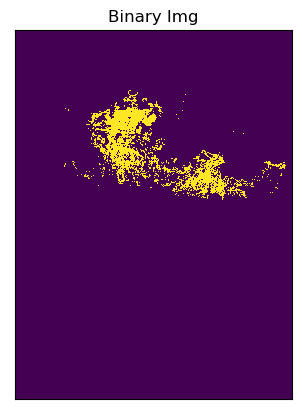

In [66]:
image1 = 29
image2 = image1+1
tiff_name1 = join(tiff_dir, tiff_files[image1])  ## Here is where you specify the file
I_orig1 = tiff.imread(tiff_name1)  # This loads the image file into memory
tiff_name2 = join(tiff_dir, tiff_files[image2])  ## Here is where you specify the file
I_orig2 = tiff.imread(tiff_name2)  # This loads the image file into memory

fig, ax = plt.subplots()
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False) 
# ax[0].set_title(tiff_name1[15:])
# ax[1].set_title(tiff_name2[15:])
# ax[0].set_title("Image 1")
# ax[1].set_title("Image 2")
ax.set_title("Binary Img")
# ax[0].imshow(I_orig1/256**2)
# ax[1].imshow(I_orig2/256**2)

bin_img = generateSubtractedImg(image1, image2)
ax.imshow(bin_img)

C:\Users\kaitl\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\kaitl\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


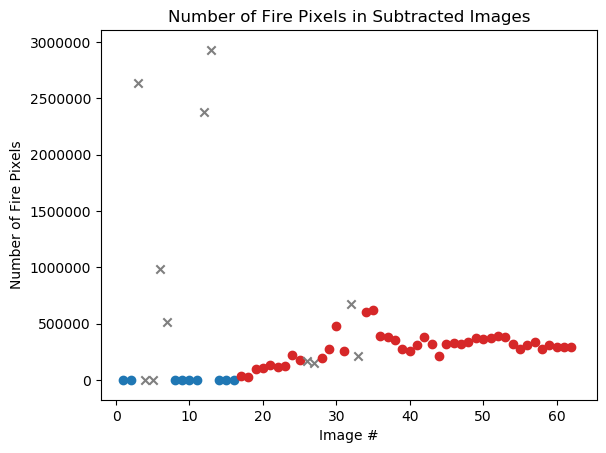

In [55]:
fig, ax = plt.subplots()

for i in range(0,len(tiff_files)-2):
    I_sub = generateSubtractedImg(i,i+1)
    fire_pixels = np.count_nonzero(I_sub)
    marker_style = 'o'
    color = '#d62728'
    if fire_pixels == 0:
        color = '#1f77b4'
    if isSaturated(i) or isSaturated(i+1):
        marker_style = 'x'
        color = '#7f7f7f'
    plt.scatter(i+1, fire_pixels, marker = marker_style, c = color)
    
ax.set_ylabel("Number of Fire Pixels")
ax.set_xlabel("Image #")
ax.set_title("Number of Fire Pixels in Subtracted Images")
plt.show()

